In [9]:
%reset
import sys, platform, os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pdb
import healpy as hp
from astropy.io import fits
import time
import math
from scipy import interpolate
import pickle as pk
import treecorr
import astropy.units as u
from astropy.cosmology import FlatLambdaCDM
# import astropy.constant as c
sys.path.insert(0,'../')

cosmo_des = FlatLambdaCDM(H0=100, Om0=0.283705720011)
cosmo_pl = FlatLambdaCDM(H0=100, Om0=0.3158)


#see http://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

%matplotlib inline





Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
!python '/global/project/projectdirs/des/shivamp/cosmosis/y3kp-bias-model/3d_stats/process_measure_data/correlate_gg_gm_3d_funcs_mice.py' --bin 4



  File "/global/project/projectdirs/des/shivamp/cosmosis/y3kp-bias-model/3d_stats/process_measure_data/correlate_gg_gm_3d_funcs_mice.py", line 24
    print 'nthreads are ', nthreads
                        ^
SyntaxError: Missing parentheses in call to 'print'. Did you mean print('nthreads are ', nthreads)?


In [10]:
# filenames_gg = ['/global/project/projectdirs/des/y3-bias/MICE_all_data/v2/gg_3dcorr_r_0.5_80.0_nr_20_zbin_1_jk_True_njk_200_dsg_1_dsm_1.pk',
# '/global/project/projectdirs/des/y3-bias/MICE_all_data/v2/gg_3dcorr_r_0.5_80.0_nr_20_zbin_2_jk_True_njk_200_dsg_1_dsm_1.pk',
# '/global/project/projectdirs/des/y3-bias/MICE_all_data/v2/gg_3dcorr_r_0.5_80.0_nr_20_zbin_3_jk_True_njk_200_dsg_1_dsm_1.pk',
#             ]



# filenames_gm = ['/global/project/projectdirs/des/y3-bias/MICE_all_data/v2/gm_3dcorr_r_0.5_80.0_nr_20_zbin_1_jk_True_njk_200_dsg_1_dsm_1.pk',
# '/global/project/projectdirs/des/y3-bias/MICE_all_data/v2/gm_3dcorr_r_0.5_80.0_nr_20_zbin_2_jk_True_njk_200_dsg_1_dsm_1.pk',
# '/global/project/projectdirs/des/y3-bias/MICE_all_data/v2/gm_3dcorr_r_0.5_80.0_nr_20_zbin_3_jk_True_njk_200_dsg_1_dsm_1.pk',
#             ]





In [11]:
njk = 180
rmin = 0.5
rmax = 50.0
nr = 16

filenames_gg = ['/global/project/projectdirs/des/y3-bias/MICE_all_data/v2/gg_3dcorr_r_' + str(rmin) + '_' + str(rmax) + '_nr_' + str(nr) + '_zbin_1_jk_True_njk_' + str(njk) + '_dsg_1_dsm_1.pk',
                '/global/project/projectdirs/des/y3-bias/MICE_all_data/v2/gg_3dcorr_r_' + str(rmin) + '_' + str(rmax) + '_nr_' + str(nr) + '_zbin_2_jk_True_njk_' + str(njk) + '_dsg_1_dsm_1.pk',
                '/global/project/projectdirs/des/y3-bias/MICE_all_data/v2/gg_3dcorr_r_' + str(rmin) + '_' + str(rmax) + '_nr_' + str(nr) + '_zbin_3_jk_True_njk_' + str(njk) + '_dsg_1_dsm_1.pk',
                '/global/project/projectdirs/des/y3-bias/MICE_all_data/v2/gg_3dcorr_r_' + str(rmin) + '_' + str(rmax) + '_nr_' + str(nr) + '_zbin_4_jk_True_njk_' + str(njk) + '_dsg_1_dsm_1.pk',
'/global/project/projectdirs/des/y3-bias/MICE_all_data/v2/gg_3dcorr_r_' + str(rmin) + '_' + str(rmax) + '_nr_' + str(nr) + '_zbin_5_jk_True_njk_' + str(njk) + '_dsg_1_dsm_1.pk',
            ]



filenames_gm = ['/global/project/projectdirs/des/y3-bias/MICE_all_data/v2/gm_3dcorr_r_' + str(rmin) + '_' + str(rmax) + '_nr_' + str(nr) + '_zbin_1_jk_True_njk_' + str(njk) + '_dsg_1_dsm_1.pk',
                '/global/project/projectdirs/des/y3-bias/MICE_all_data/v2/gm_3dcorr_r_' + str(rmin) + '_' + str(rmax) + '_nr_' + str(nr) + '_zbin_2_jk_True_njk_' + str(njk) + '_dsg_1_dsm_1.pk',
                '/global/project/projectdirs/des/y3-bias/MICE_all_data/v2/gm_3dcorr_r_' + str(rmin) + '_' + str(rmax) + '_nr_' + str(nr) + '_zbin_3_jk_True_njk_' + str(njk) + '_dsg_1_dsm_1.pk',
                '/global/project/projectdirs/des/y3-bias/MICE_all_data/v2/gm_3dcorr_r_' + str(rmin) + '_' + str(rmax) + '_nr_' + str(nr) + '_zbin_4_jk_True_njk_' + str(njk) + '_dsg_1_dsm_1.pk',
'/global/project/projectdirs/des/y3-bias/MICE_all_data/v2/gm_3dcorr_r_' + str(rmin) + '_' + str(rmax) + '_nr_' + str(nr) + '_zbin_5_jk_True_njk_' + str(njk) + '_dsg_1_dsm_1.pk',
            ]



In [12]:
# njk = 400

xi_gg_big_combined = np.array([])

xi_gm_big_combined = np.array([])

xi_gg_true = np.array([])
xi_gm_true = np.array([])

xi_gg_sigma = np.array([])
xi_gm_sigma = np.array([])

r_gg_all = np.array([])
r_gm_all = np.array([])

   

for j in range(len(filenames_gg)):
    filename_gg = filenames_gg[j]
    filename_gm = filenames_gm[j]

    gg_data = pk.load(open(filename_gg, "rb"))
    gm_data = pk.load(open(filename_gm, "rb"))

    
    xi_ggtruth = gg_data['xi_gg_full']
    xi_gmtruth = gm_data['xi_gm_full']


    r_gm =  gm_data['r_gm']
    xi_gmtruth_all = gm_data['xigm_big_all']
    xi_gmtruth_mean = np.tile(xi_gmtruth.transpose(),(njk,1))
    xi_gmtruth_sub = xi_gmtruth_all - xi_gmtruth_mean
    xi_gmtruth_sigma = np.sqrt((1.0*(njk-1.)/njk)*(np.sum(np.square(xi_gmtruth_all - xi_gmtruth_mean),axis=0)))


    r_gg =  gg_data['r_gg']
    xi_ggtruth_all = gg_data['xigg_big_all']
    xi_ggtruth_mean = np.tile(xi_ggtruth.transpose(),(njk,1))
    xi_ggtruth_sub = xi_ggtruth_all - xi_ggtruth_mean
    xi_ggtruth_sigma = np.sqrt((1.0*(njk-1.)/njk)*(np.sum(np.square(xi_ggtruth_all - xi_ggtruth_mean),axis=0)))

    if len(xi_gg_big_combined) == 0:
        xi_gg_big_combined = xi_ggtruth_sub
        xi_gm_big_combined = xi_gmtruth_sub
    else:
        xi_gg_big_combined = np.hstack((xi_gg_big_combined,xi_ggtruth_sub))
        xi_gm_big_combined = np.hstack((xi_gm_big_combined,xi_gmtruth_sub))
        
    if len(xi_gg_big_combined) == 0:
        xi_gg_true = xi_ggtruth
        xi_gm_true = xi_gmtruth
        xi_gm_sigma = xi_gmtruth_sigma
        xi_gg_sigma = xi_ggtruth_sigma
    else:
        xi_gg_true = np.hstack((xi_gg_true,xi_ggtruth))
        xi_gm_true = np.hstack((xi_gm_true,xi_gmtruth))
        xi_gm_sigma = np.hstack((xi_gm_sigma,xi_gmtruth_sigma))
        xi_gg_sigma = np.hstack((xi_gg_sigma,xi_ggtruth_sigma))
    
    if len(r_gg_all) == 0:
        r_gg_all = r_gg
        r_gm_all = r_gm        
    else:
        r_gg_all = np.vstack((r_gg_all,r_gg))
        r_gm_all = np.vstack((r_gm_all,r_gm))


xi_big_combined = np.hstack((xi_gg_big_combined,xi_gm_big_combined))

cov_combined = (1.0*(njk-1.)/njk)*np.matmul(xi_big_combined.T,xi_big_combined)

xi_true = np.hstack((xi_gg_true,xi_gm_true))

xi_sigma_true = np.hstack((xi_gg_sigma,xi_gm_sigma))

r_all = np.vstack((r_gg_all,r_gm_all))






In [13]:
r_all[0]



array([ 0.5791835 ,  0.77477235,  1.03502583,  1.38126053,  1.84428434,
        2.46209276,  3.28725493,  4.39000832,  5.85757944,  7.82174646,
       10.44185803, 13.93245361, 18.59260349, 24.81011056, 33.09052675,
       44.13949015])

In [14]:
xi_true[0:16]/xi_sigma_true[0:16]



array([56.93274879, 66.81324918, 70.89677286, 70.1800366 , 85.67956012,
       87.82147619, 84.10036234, 86.53679271, 71.50452495, 67.76798374,
       56.62292772, 44.28333246, 34.41257138, 23.24830922, 13.92536439,
        7.84852404])

In [5]:
results_dict = {}

results_dict['sep'] = r_all
results_dict['mean'] = xi_true
results_dict['cov'] = cov_combined

filename_save = '/global/project/projectdirs/des/y3-bias/MICE_all_data/v2/gg_gm_datavec_3dcorr_r_' + str(rmin) + '_' + str(rmax) + '_nr_' + str(nr) + '_zbin_1_2_3_4_5_jk_True_njk_' + str(njk) + '.pk'    

pk.dump(results_dict,open(filename_save,'wb'))



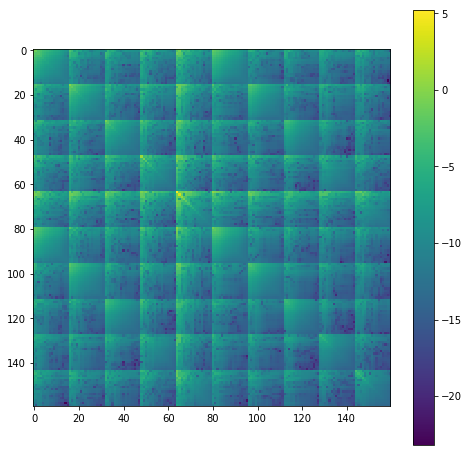

In [6]:
fig, ax = plt.subplots(1,1, figsize = (8,8))
cov = ax.imshow(np.log(np.abs(cov_combined)))
fig.colorbar(cov)
# plt.savefig('3d_logabs_cov_mat.pdf')


In [26]:
def get_corr(cov):
    corr = np.zeros(cov.shape)
    for ii in xrange(0,cov.shape[0]):
        for jj in xrange(0,cov.shape[1]):
            corr[ii,jj] = cov[ii,jj]/np.sqrt(cov[ii,ii]*cov[jj,jj])
    return corr


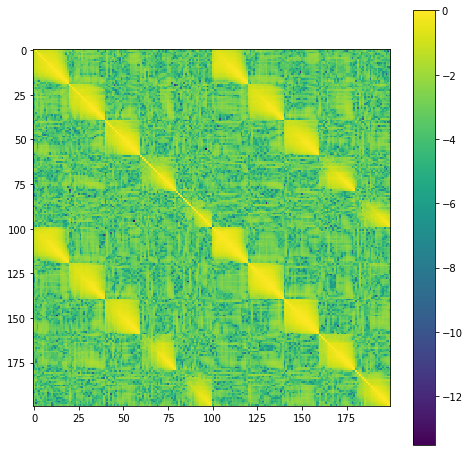

In [7]:
fig, ax = plt.subplots(1,1, figsize = (8,8))
corr = ax.imshow(np.log(np.abs(get_corr(cov_combined))))
fig.colorbar(corr, ax=ax)
plt.savefig('3d_corr_mat.pdf')



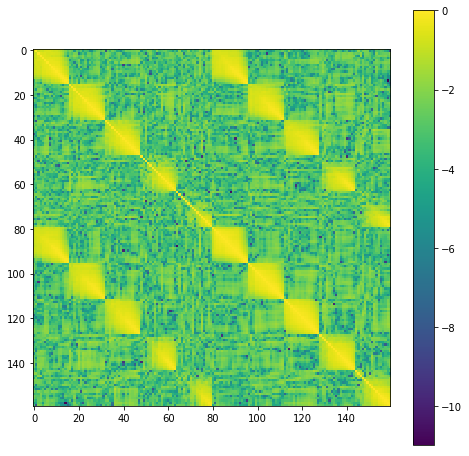

In [8]:
fig, ax = plt.subplots(1,1, figsize = (8,8))
corr = ax.imshow(np.log(np.abs(get_corr(cov_combined))))
fig.colorbar(corr, ax=ax)
plt.savefig('3d_corr_mat.pdf')





In [10]:
# sig_diag = np.sqrt(np.diag(cov_combined))

# fig, ax = plt.subplots(1,1, figsize = (10,8))


# ax.errorbar(r_all[0],xi_gg_true[80:100],sig_diag[80:100], color = 'blue', marker='*',linestyle='',label=r'$\xi_{gg}$')
# ax.errorbar(r_all[0],xi_gm_true[80:100], color = 'red', marker='*',linestyle='',label=r'$\xi_{gm}$')
# ax.set_yscale('log')
# ax.set_xscale('log')
# # ax.set_ylim(-0.1,0.1)
# # ax.set_xlabel(r'$\theta$', size = 18)
# ax.set_ylabel(r'$\xi(R)$ comparison', size = 22)
# ax.legend(fontsize=20)
# plt.tick_params(axis='both', which='major', labelsize=15)
# plt.tick_params(axis='both', which='minor', labelsize=15)

# plt.tight_layout()
# # fig.savefig('xi_gg_gm_comp.pdf', format = 'pdf')














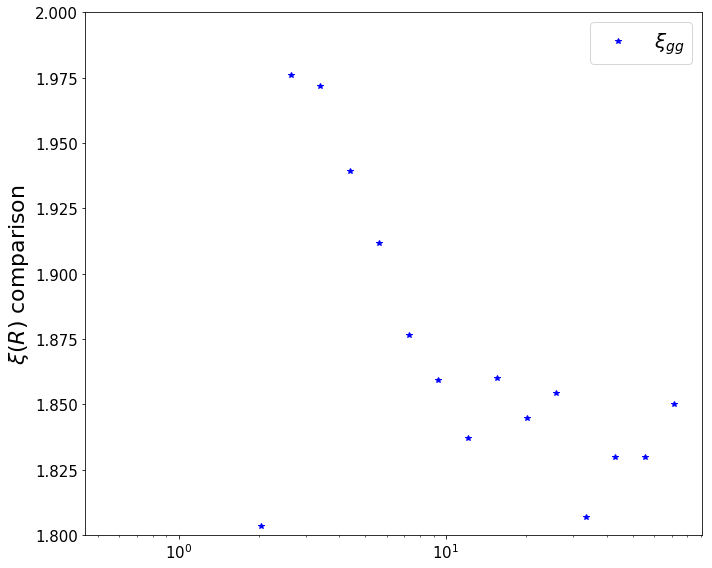

In [9]:
# sig_diag = np.sqrt(np.diag(cov_combined))

# fig, ax = plt.subplots(1,1, figsize = (10,8))
# ind_min = 60
# ind_max = ind_min + nr

# ax.errorbar(r_all[0],xi_gg_true[ind_min:ind_max]/xi_gm_true[ind_min:ind_max], color = 'blue', marker='*',linestyle='',label=r'$\xi_{gg}$')
# # ax.errorbar(r_all[0],xi_gm_true[80:100], color = 'red', marker='*',linestyle='',label=r'$\xi_{gm}$')
# # ax.set_yscale('log')
# ax.set_xscale('log')
# ax.set_ylim(1.8,2.0)
# # ax.set_xlabel(r'$\theta$', size = 18)
# ax.set_ylabel(r'$\xi(R)$ comparison', size = 22)
# ax.legend(fontsize=20)
# plt.tick_params(axis='both', which='major', labelsize=15)
# plt.tick_params(axis='both', which='minor', labelsize=15)

# plt.tight_layout()
# # fig.savefig('xi_gg_gm_comp.pdf', format = 'pdf')











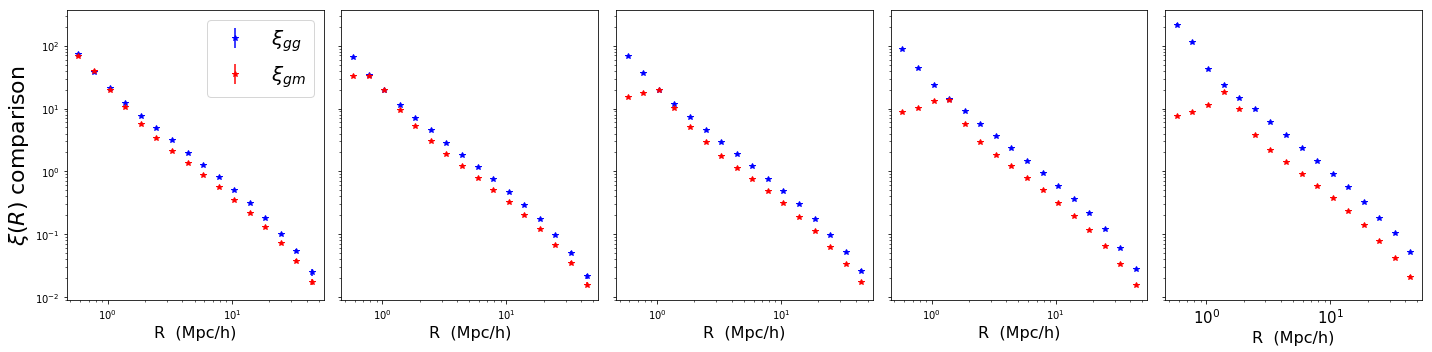

In [11]:
sig_diag = np.sqrt(np.diag(cov_combined))

fig, ax = plt.subplots(1,5, figsize = (20,5),sharey=True)

for j in range(5):
#     ax.errorbar(np.arange(100),xi_gg_true,sig_diag[0:100], color = 'blue', marker='*',linestyle='',label=r'$\xi_{gg}$')
#     ax.errorbar(np.arange(100),xi_gm_true,sig_diag[100:200], color = 'red', marker='*',linestyle='',label=r'$\xi_{gm}$')
    
    ax[j].errorbar(r_all[j],xi_gg_true[j*nr:(j+1)*nr],sig_diag[j*nr:(j+1)*nr], color = 'blue', marker='*',linestyle='',label=r'$\xi_{gg}$')
    ax[j].errorbar(r_all[j],xi_gm_true[j*nr:(j+1)*nr],sig_diag[j*nr + (nr*5):(j+1)*nr + (nr*5)], color = 'red', marker='*',linestyle='',label=r'$\xi_{gm}$')  
    ax[j].set_yscale('log')
    ax[j].set_xscale('log')
    ax[j].set_xlabel(r'R  (Mpc/h)', size = 16)
# ax.set_ylim(-0.1,0.1)
# ax.set_xlabel(r'$\theta$', size = 18)
ax[0].set_ylabel(r'$\xi(R)$ comparison', size = 22)

ax[0].legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

plt.tight_layout()
# fig.savefig('xi_gg_gm_comp.png')











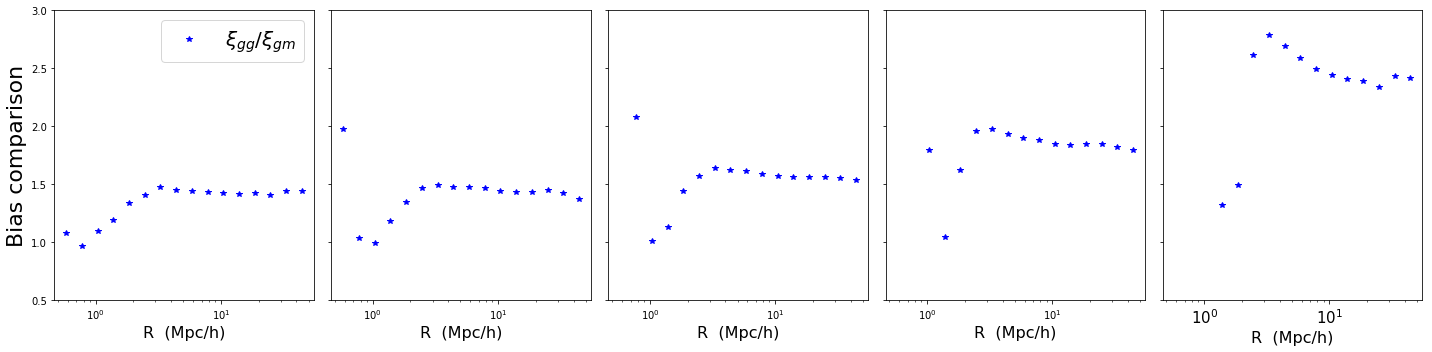

In [12]:
sig_diag = np.sqrt(np.diag(cov_combined))

fig, ax = plt.subplots(1,5, figsize = (20,5),sharey=True)

for j in range(5):
#     ax.errorbar(np.arange(100),xi_gg_true,sig_diag[0:100], color = 'blue', marker='*',linestyle='',label=r'$\xi_{gg}$')
#     ax.errorbar(np.arange(100),xi_gm_true,sig_diag[100:200], color = 'red', marker='*',linestyle='',label=r'$\xi_{gm}$')
    
    ax[j].errorbar(r_all[j],xi_gg_true[j*nr:(j+1)*nr]/xi_gm_true[j*nr:(j+1)*nr], color = 'blue', marker='*',linestyle='',label=r'$\xi_{gg}/\xi_{gm}$')
#     ax[j].errorbar(r_all[j],,sig_diag[j*20 + 100:(j+1)*20 + 100], color = 'red', marker='*',linestyle='',label=r'$\xi_{gm}$')
#     ax[j].set_yscale('log')
    ax[j].set_xscale('log')
    ax[j].set_xlabel(r'R  (Mpc/h)', size = 16)
ax[0].set_ylim(0.5,3.)
# ax.set_xlabel(r'$\theta$', size = 18)
ax[0].set_ylabel(r'Bias comparison', size = 22)
ax[0].legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

plt.tight_layout()
# fig.savefig('3d_bias_comp.png')












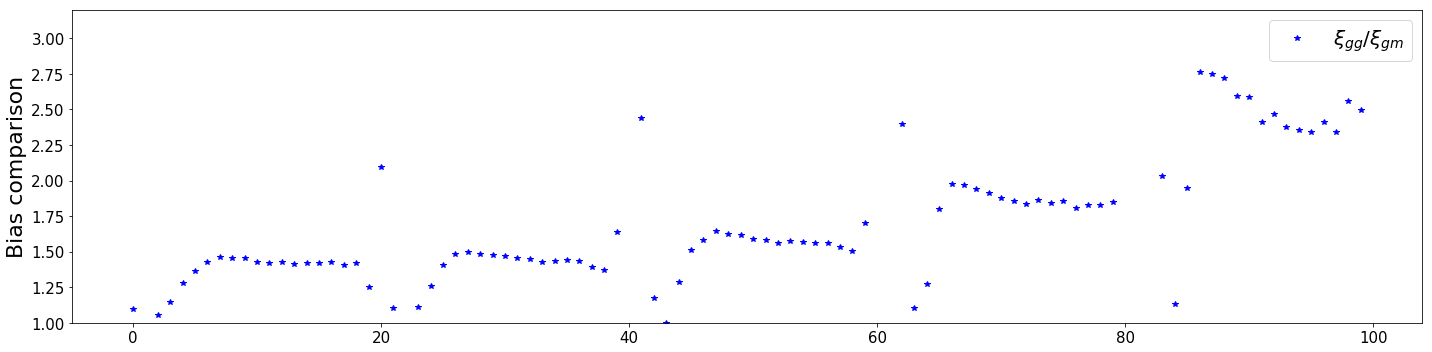

In [32]:
sig_diag = np.sqrt(np.diag(cov_combined))

fig, ax = plt.subplots(1,1, figsize = (20,5))


ax.errorbar(np.arange(100),xi_gg_true/xi_gm_true, color = 'blue', marker='*',linestyle='',label=r'$\xi_{gg}/\xi_{gm}$')

# ax.set_yscale('log')
ax.set_ylim(1.0,3.2)
# ax.set_xlabel(r'$\theta$', size = 18)
ax.set_ylabel(r'Bias comparison', size = 22)
ax.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

plt.tight_layout()
fig.savefig('3d_bias_comp.pdf', format = 'pdf')







In [33]:
pc = np.loadtxt('/global/u1/s/spandey/cosmosis_exp/cosmosis/y3kp-bias-model/codecomp/pd1d3nl.txt')
kc,pc = pc[:,0],pc[:,1]

pe = np.loadtxt('/global/u1/s/spandey/cosmosis_exp/cosmosis/y3kp-bias-model/codecomp/pd1d3_e.txt')
ke,pe = pe[:,0],pe[:,1]


In [32]:
cov_gg_b = cov_combined[16*(j-1):16*j,16*(j-1):16*j]

cov_gm_b = cov_combined[(80 + 16*(j-1)):(80 + 16*j),(80 + 16*(j-1)):(80 + 16*j)]

inv_cov_gg_b = np.linalg.inv(cov_gg_b)

inv_cov_gm_b = np.linalg.inv(cov_gm_b)



In [34]:
cov_gg_gm_b = np.zeros(cov_gg_b.shape)

inv_cov_gg_gm_b = np.zeros(cov_gg_b.shape)

cov_b_comb = np.vstack((np.hstack((cov_gg_b,cov_gg_gm_b)),np.hstack((cov_gg_gm_b,cov_gm_b))))


inv_cov_b_comb = np.vstack((np.hstack((inv_cov_gg_b,inv_cov_gg_gm_b)),np.hstack((inv_cov_gg_gm_b,inv_cov_gm_b))))



/global/u1/s/spandey/myenv_new/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


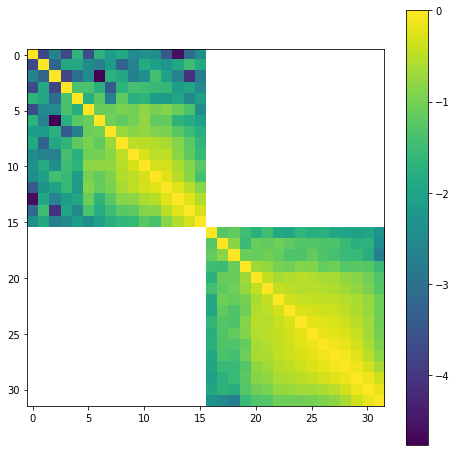

In [27]:
fig, ax = plt.subplots(1,1, figsize = (8,8))
corr = ax.imshow(np.log(np.abs(get_corr(cov_b_comb))))
fig.colorbar(corr, ax=ax)
# plt.savefig('3d_corr_mat.pdf')




In [28]:

inv_cov_b = np.linalg.inv(cov_b_comb)



/global/u1/s/spandey/myenv_new/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


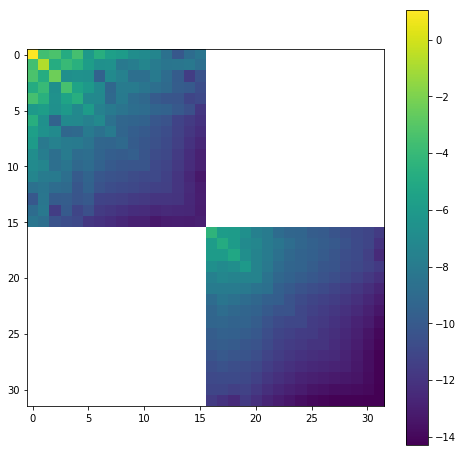

In [30]:
fig, ax = plt.subplots(1,1, figsize = (8,8))
corr = ax.imshow(np.log(np.abs((cov_b_comb))))
fig.colorbar(corr, ax=ax)



/global/u1/s/spandey/myenv_new/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


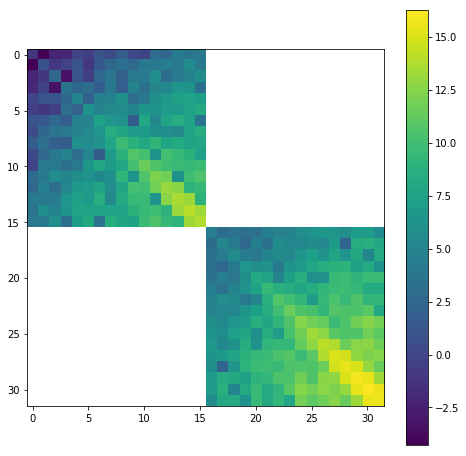

In [31]:
fig, ax = plt.subplots(1,1, figsize = (8,8))
corr = ax.imshow(np.log(np.abs((inv_cov_b))))
fig.colorbar(corr, ax=ax)




/global/u1/s/spandey/myenv_new/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


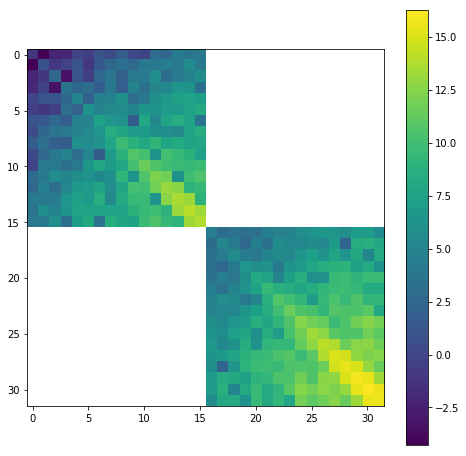

In [35]:
fig, ax = plt.subplots(1,1, figsize = (8,8))
corr = ax.imshow(np.log(np.abs((inv_cov_b_comb))))
fig.colorbar(corr, ax=ax)

